### Performing a Niwot pySUMMA Run

Import packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysumma as ps
import copy
import os.path

from pysumma.plotting import plotting
from jupyterthemes import jtplot

import pandas as pd
import numpy as np
import xarray as xr

In [2]:
# Plotting assistance defaults set here
import seaborn as sns # a module that adds some plotting capabilities and makes your plots look better
import matplotlib as mpl
sns.set() # activates some of the default settings from seaborn
# The following settings just set some defaults for the plots
plt.rcParams['figure.figsize']  = (11, 4)
plt.rcParams['axes.titlesize']  = 14
plt.rcParams['axes.labelsize']  = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams['figure.dpi'] = 100

In [3]:
# Create SUMMA excecuteable and paths 
summa_executable = 'summa.exe'
case_path = '/home/jovyan/work/cewa564_project/niwot/summa_setup'
filemanager_path = os.path.join(case_path, 'file_manager.txt') 

# Create a Default Simulation Object
S = ps.Simulation(executable='summa.exe', filemanager=filemanager_path)

# add the canopyWat & others to the output simulation object
#S.output_control.set_option(name='scalarCanopyWat',period=1, instant=1, sum=0, mean=0, variance=0, min=0, max=0, mode=0)
#S.output_control.set_option(name='scalarSnowAge',period=1, instant=1, sum=0, mean=0, variance=0, min=0, max=0, mode=0)
#S.output_control.set_option(name='scalarCanopyWetFraction',period=1, instant=1, sum=0, mean=0, variance=0, min=0, max=0, mode=0)

In [4]:
# set the simulation start and finish times
S.decisions.simulStart.set_value("2015-10-01 00:00")
S.decisions.simulFinsh.set_value("2016-07-26 00:00")

In [5]:
# Run the pySUMMA simulation
S.start(run_option='local', run_suffix='niwot_default')
S.monitor()

True

In [6]:
# finding any errors... 
print('stdout:\n-------\n{}\n========\n'.format(S.stdout))
print('stderr:\n-------\n{}\n========\n'.format(S.stderr))

stdout:
-------
file_suffix is 'niwot_default'.
file_master is '/home/jovyan/work/cewa564_project/niwot/summa_setup/file_manager.txt'.
start at 21:05:25
Name of Model Output control file: /home/jovyan/cues/summa_setup/settings/output_control.txt
decisions file =  /home/jovyan/cues/summa_setup/settings/decisions.txt
   1 simulStart: 2015-10-01 00:00
   2 simulFinsh: 2016-07-26 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: MODIFIED_IGBP_MODIS_NOAH
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: qTopmodl
  12 hc_profile: pow_prof
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux
  15 bcUpprSoiH: liq_flux
  16 bcLowrSoiH: zeroFlux
  17 veg_traits: CM_QJRMS1988
  18 rootProfil: powerLaw
  19 canopyEmis: difTrans
  20 snowIncept: lightSnow
  21 windPrfile: logBelowCanopy
  22 astability: louisinv
  23 canopySrad: BeersLaw
  24 alb_method: varDecay
  25 compaction:

/srv/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'SWE in the Canopy [cm]')

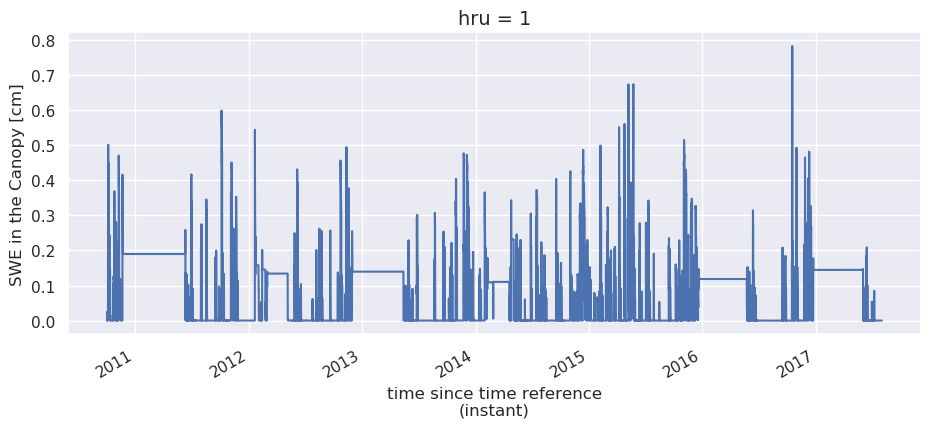

In [6]:
# Getting snow in the canopy as an ammount in [cm] using the density of water 
# density of water is 997 kg/m^3 
# our mass of total water in the canopy is kg / m^2 

canopySWE = (S.output.scalarCanopyWat/997)*100 # also, multiply by 100 to get from m to cm of SWE in canopy [cm]
canopySWE.plot()
plt.ylabel('SWE in the Canopy [cm]')

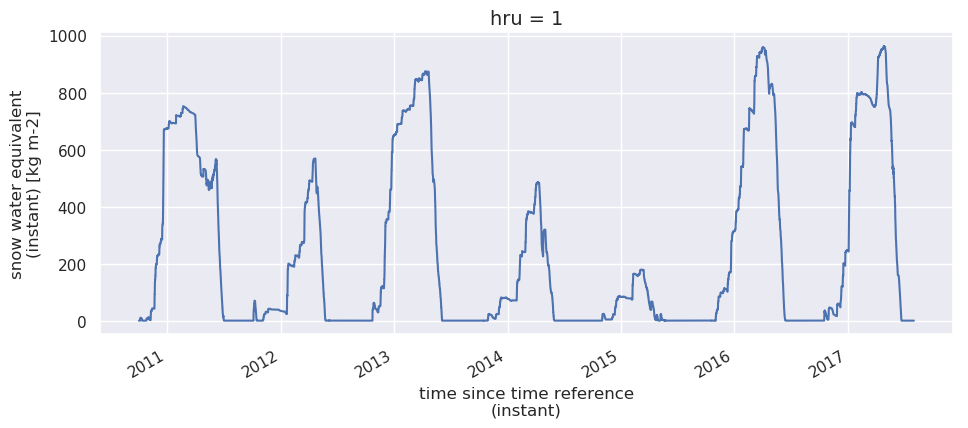

In [7]:
S.output.scalarSWE.plot()